In [4]:
# %load /home/feng/figureScript/test__vmfMixture.py
#!/usr/bin/env python
NCORE= 1
import sklearn.datasets as skdat
data_digit = data = skdat.load_digits()
din = data['data']
data_digit.keys()
y_true = data_digit['target']

# import mixem.distribution

import copy
import numpy as np
import pymisca.model_collection.mixture_vmf as mod
import pymisca.fop as pyfop
import pymisca.ext as pyext
import pymisca.util as pyutil
reload(pyext)
'''
chcek out http://people.duke.edu/~ccc14/sta-663-2017/ for python tutorial
'''

if 1:
    nIter = 3000
    nStart = 1
#     betas = lambda i: (i + 1) * 0.00015 + 0.15
    callback = mod.callback__stopAndTurn(
        start=0.15,
        step=0.00015)
#     callback = pyfop.composeF(callback__stopAndTurn(betas=betas),
# #                              callback__stopOnClu(interval=1)
#                              )
    data = din
    mdl0 = mdl = mod.MixtureVMF(init_method = 'random',
                        NCORE=NCORE,
#                          beta = betas(0),
                         weighted =  True,
                         normalizeSample=0,
                        kappa = None,
                        K = 30,)
    res = mdl.fit(data,verbose=2,
                  nStart=nStart,
                  callback = callback,
                  min_iters = nIter,
                  max_iters = nIter,
                  sample_weights=None,
                 )                

[iter]0,                log_likelihood=20309.61
[iter]10,                log_likelihood=9085.91
[iter]20,                log_likelihood=9173.54
[iter]30,                log_likelihood=9263.53
[iter]40,                log_likelihood=9353.55
[iter]50,                log_likelihood=9443.57
[iter]60,                log_likelihood=9533.60
[iter]70,                log_likelihood=9623.62
[iter]80,                log_likelihood=9713.65
[iter]90,                log_likelihood=9803.67
[iter]100,                log_likelihood=9893.70
[iter]110,                log_likelihood=9983.72
[iter]120,                log_likelihood=10073.75
[iter]130,                log_likelihood=10163.77
[iter]140,                log_likelihood=10253.80
[iter]150,                log_likelihood=10343.82
[iter]160,                log_likelihood=10433.84
[iter]170,                log_likelihood=10523.87
[iter]180,                log_likelihood=10613.89
[iter]190,                log_likelihood=10703.92
[iter]200,            

[iter]1620,                log_likelihood=21164.55
[iter]1630,                log_likelihood=21285.26
[iter]1640,                log_likelihood=21405.89
[iter]1650,                log_likelihood=21526.43
[iter]1660,                log_likelihood=21646.93
[iter]1670,                log_likelihood=21767.92
[iter]1680,                log_likelihood=21892.13
[iter]1690,                log_likelihood=22017.71
[iter]1700,                log_likelihood=22144.50
[iter]1710,                log_likelihood=22272.17
[iter]1720,                log_likelihood=22400.05
[iter]1730,                log_likelihood=22527.15
[iter]1740,                log_likelihood=22652.85
[iter]1750,                log_likelihood=22777.32
[iter]1760,                log_likelihood=22901.24
[iter]1770,                log_likelihood=23025.40
[iter]1780,                log_likelihood=23150.91
[iter]1790,                log_likelihood=23283.32
[iter]1800,                log_likelihood=23425.42
[iter]1810,                log_

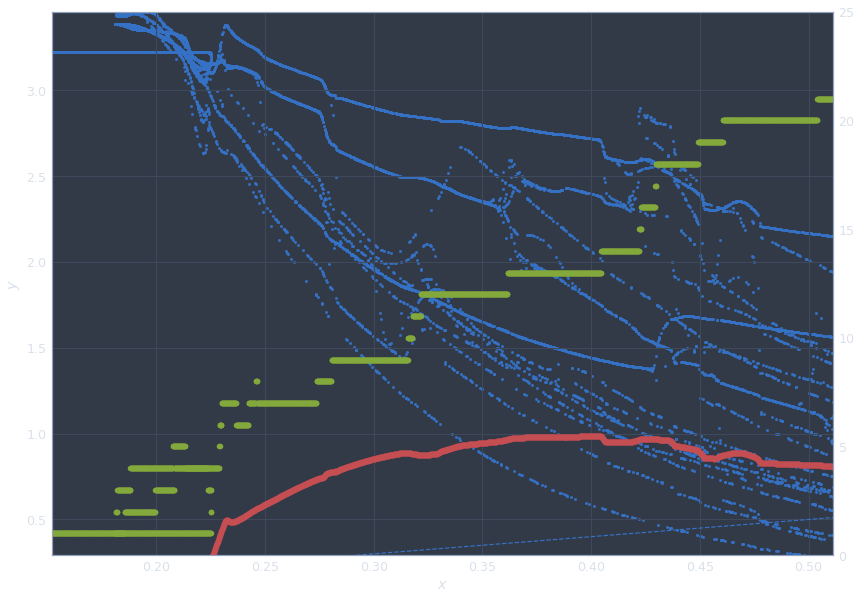

In [8]:
reload(mod)
%matplotlib inline
mod.qc__vmf(mdl0)

In [ ]:
# import pymisca.util as pyutil
def visModel(mdl,subIdx=None):
    data = din
    y_pred = clu = mdl.predict(data)
    clu = pd.DataFrame(y_pred,columns=['clu'])
    cluCount = pyutil.get_cluCount(clu)
    print len(cluCount)
    if subIdx is not None:
        cluCount = cluCount.set_index('clu',drop=0).reindex(subIdx)
        cluCount = cluCount.dropna()
#         .fillna(-1).astype(int)
    idx = cluCount.sort_values('count').clu
    confMat = pyutil.getConfusionMat(y_pred,y_true)
    pyvis.heatmap(confMat.loc[:,idx],xtick=idx)
    ll = mdl.lastLL
    return 

# for i in [3,23,5]:
def plotFilter(i):
    vlim= pyutil.span(mdl.dists[0].mu)
    print mdl.dists[i].mu.sum()
    pyvis.heatmap(mdl.dists[i].mu.reshape((8,8)),vlim=vlim)
    plt.title(i)
    
def qc__vmf(callback
           ):
#     n = 4000
#     xmax = 1.0
    fig,ax = plt.subplots(1,1,figsize=[14,10])
    axs = pyvis.qc_2var(*np.broadcast_arrays(np.array(callback.betaHist)[:,None], 
                                             callback.clusterH)
                       ,nMax=int(1E4),axs=[None,ax,None,None])

    plt.sca(axs[1])
    # plt.figure()
    ax = plt.gca()
    plt.plot(callback.betaHist[-n:],callback.stats[-n:],'ro')
    tax = ax.twinx()
    tax.plot(callback.betaHist[-n:],callback.cluNum[-n:],'go')
    # tax.set_xlim(0,0.4)
    tax.set_ylim(0,25)
#     pyvis.abline(k=0,y0=2.5,ax=ax)

In [320]:
qc__vmf(callback)

(0, 1.0)

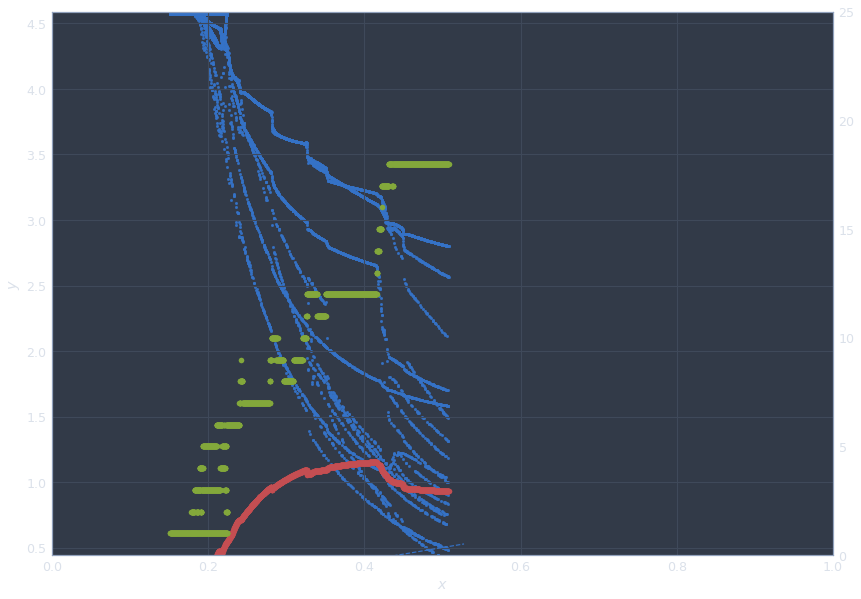

In [346]:

plt.xlim(0,xmax)


In [340]:
oldIdx = idx

0.49995
19


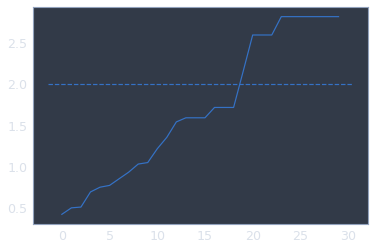

In [341]:
xcut = 0.5
ycut = 2.0

# xcut = 0.5
# ycut = 2.0

# xcut = 0.4
# ycut = 1.6

i = np.argmin(abs(np.add(callback.betaHist,
                         - xcut)))
ys = callback.clusterH[i]
mdl = callback.mdls[i][-1]
print (callback.betaHist[i])
cutoff = ycut
idx = np.where(ys < cutoff)[0]
print len(idx)
plt.plot(sorted(ys))
pyvis.abline(y0=cutoff,k=0)
# pyvis.abline(y0=2.0,k=0)

In [343]:
idx= list(set(idx) - set(oldIdx))

18


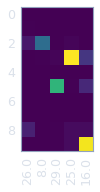

In [344]:
visModel(mdl,subIdx=idx)

12
1.1102230246251565e-15
-4.107825191113079e-15


[None, None]

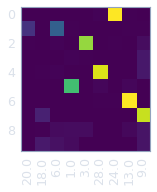

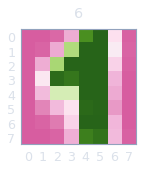

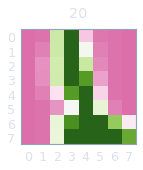

In [336]:
# idx = np.where( (ys >1.9)&(ys<2.1) )[0]
visModel(mdl,subIdx=idx)
map(plotFilter,[6,20])

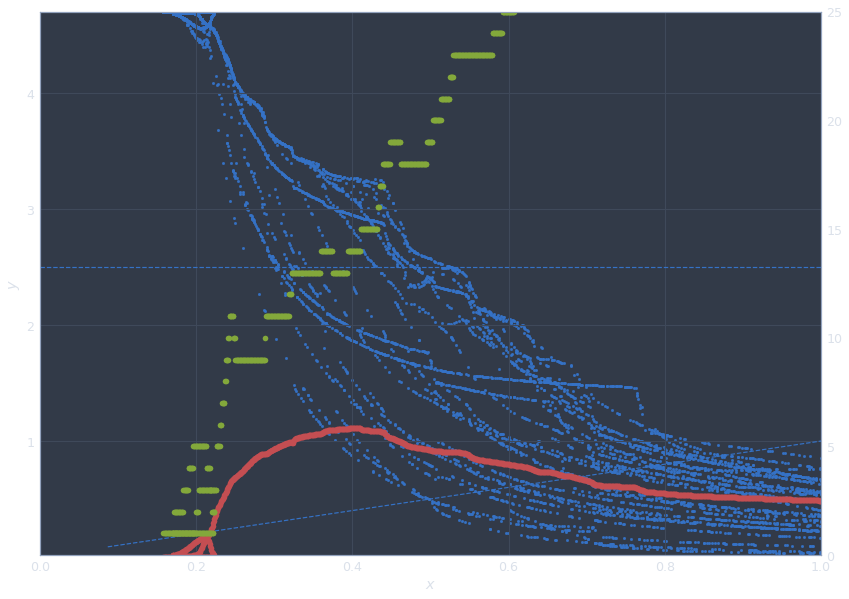

In [316]:
fig,ax = plt.subplots(1,1,figsize=[14,10])

axs = pyvis.qc_2var(*np.broadcast_arrays(np.array(callback.betaHist)[:,None], 
                                         callback.clusterH)
                   ,nMax=int(1E4),axs=[None,ax,None,None])

plt.sca(axs[1])
# plt.figure()
n = 2000
xmax = 1.0
ax = plt.gca()
plt.plot(callback.betaHist[-n:],callback.stats[-n:],'ro')
plt.xlim(0,xmax)
tax = ax.twinx()
tax.plot(callback.betaHist[-n:],callback.cluNum[-n:],'go')
# tax.set_xlim(0,0.4)
tax.set_ylim(0,25)
pyvis.abline(k=0,y0=2.5,ax=ax)

0.39975
14


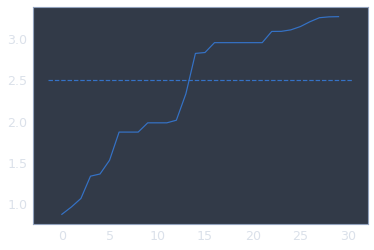

In [321]:
xcut = 0.4
ycut = 2.5

# xcut = 0.5
# ycut = 2.0

# xcut = 0.4
# ycut = 1.6

i = np.argmin(abs(np.add(callback.betaHist,
                         - xcut)))
ys = callback.clusterH[i]
mdl = callback.mdls[i][-1]
print (callback.betaHist[i])
cutoff = ycut
idx = np.where(ys < cutoff)[0]
print len(idx)
plt.plot(sorted(ys))
pyvis.abline(y0=cutoff,k=0)
# pyvis.abline(y0=2.0,k=0)

14


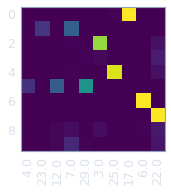

In [318]:
visModel(mdl,subIdx=idx)

14
-5.10702591327572e-15
-5.773159728050814e-15
1.1102230246251565e-16
3.3306690738754696e-15
-2.220446049250313e-16
-3.1086244689504383e-15
1.3322676295501878e-15
2.220446049250313e-16
-4.218847493575595e-15
1.6653345369377348e-15
-4.218847493575595e-15
-1.7763568394002505e-15
-4.440892098500626e-16
8.881784197001252e-16


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

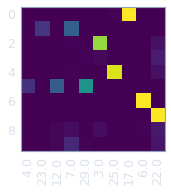

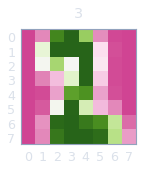

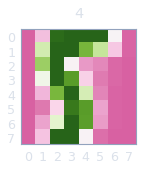

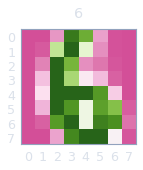

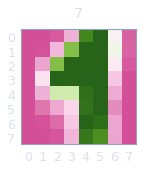

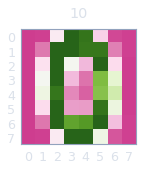

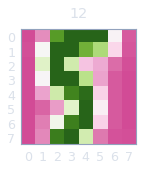

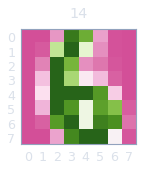

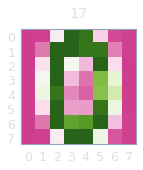

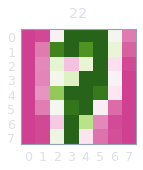

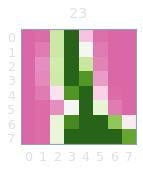

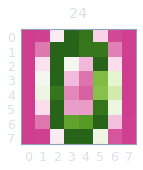

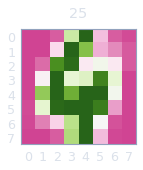

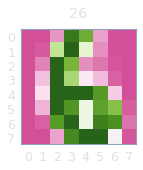

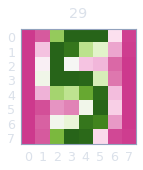

In [322]:
# idx = np.where( (ys >1.9)&(ys<2.1) )[0]
visModel(mdl,subIdx=idx)
map(plotFilter,idx)

(0, 25)

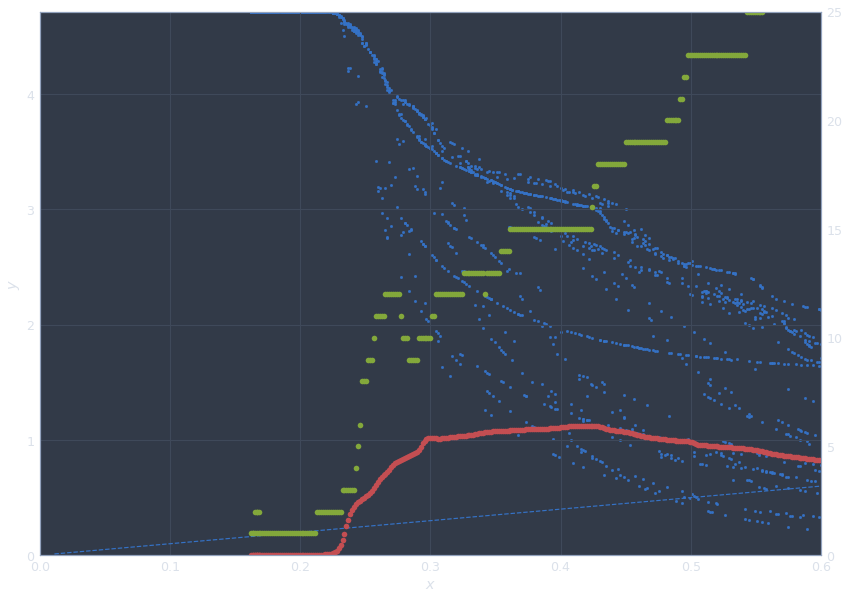

In [229]:
fig,ax = plt.subplots(1,1,figsize=[14,10])

axs = pyvis.qc_2var(*np.broadcast_arrays(np.array(callback.betaHist)[:,None], 
                                         callback.clusterH)
                   ,nMax=int(1E4),axs=[None,ax,None,None])

plt.sca(axs[1])
# plt.figure()
n = 2000
xmax = 0.6
ax = plt.gca()
plt.plot(callback.betaHist[-n:],callback.stats[-n:],'ro')
plt.xlim(0,xmax)
tax = ax.twinx()
tax.plot(callback.betaHist[-n:],callback.cluNum[-n:],'go')
# tax.set_xlim(0,0.4)
tax.set_ylim(0,25)

In [238]:
callback.clusterH[i]

array([1.96257005, 3.20766292, 3.07817658, 1.96257005, 3.20268235,
       3.078316  , 2.76696063, 1.61151812, 1.36908369, 1.25066551,
       1.93877426, 3.07796651, 0.84517352, 2.83093077, 2.62047068,
       2.79584193, 3.07856731, 1.7788078 , 3.07813444, 1.96257005,
       1.25066354, 3.07826323, 3.0790505 , 0.97585148, 1.53403849,
       2.81954436, 2.74277581, 1.29337419, 3.17634712, 3.19057369])

17


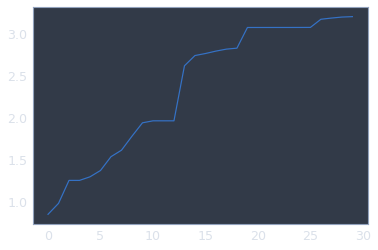

In [239]:
i = np.argmin(abs(np.add(callback.betaHist,- 0.4)))
ys = callback.clusterH[i]
print sum(ys > 2.5)
plt.plot(sorted(ys))

(0, 25)

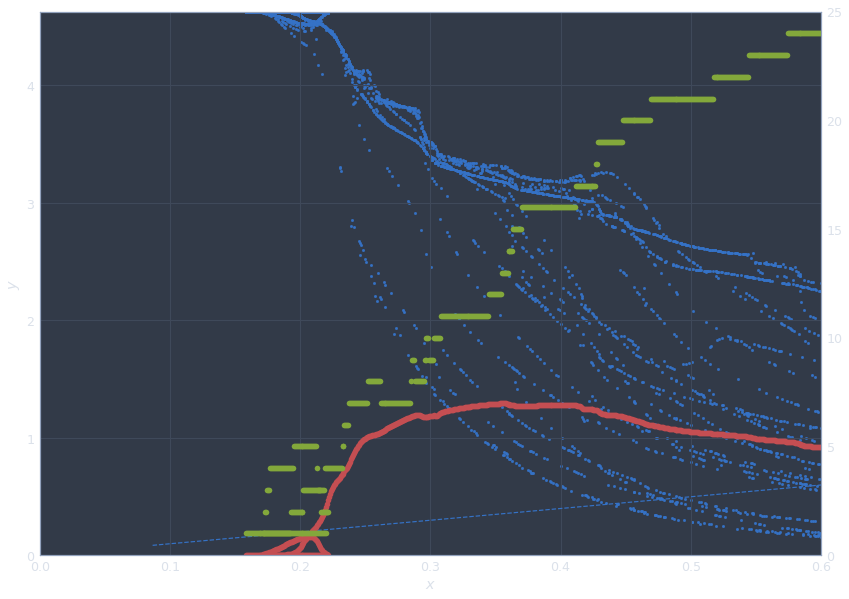

In [227]:
fig,ax = plt.subplots(1,1,figsize=[14,10])

axs = pyvis.qc_2var(*np.broadcast_arrays(np.array(callback.betaHist)[:,None], 
                                         callback.clusterH)
                   ,nMax=int(1E4),axs=[None,ax,None,None])

plt.sca(axs[1])
# plt.figure()
n = 2000
xmax = 0.6
ax = plt.gca()
plt.plot(callback.betaHist[-n:],callback.stats[-n:],'ro')
plt.xlim(0,xmax)
tax = ax.twinx()
tax.plot(callback.betaHist[-n:],callback.cluNum[-n:],'go')
# tax.set_xlim(0,0.4)
tax.set_ylim(0,25)

(0, 25)

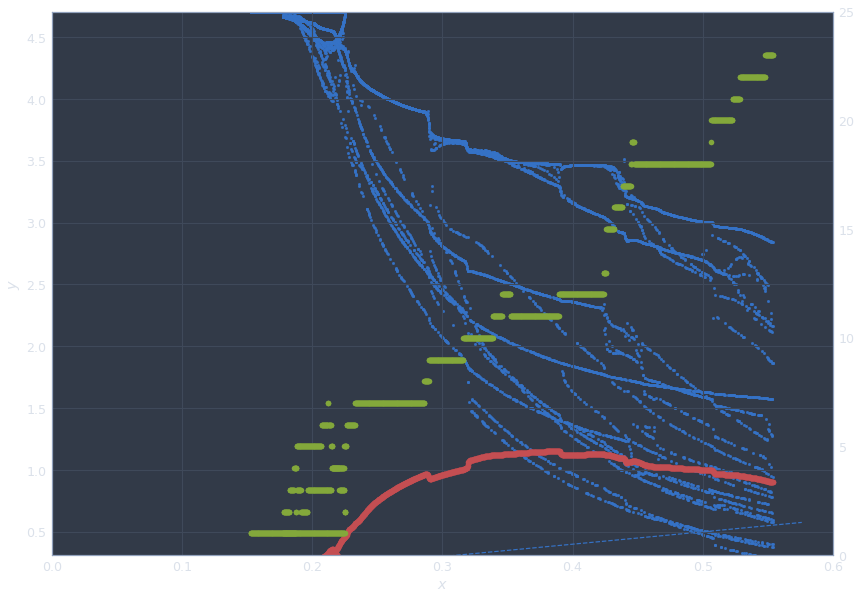

In [225]:
fig,ax = plt.subplots(1,1,figsize=[14,10])

axs = pyvis.qc_2var(*np.broadcast_arrays(np.array(callback.betaHist)[:,None], 
                                         callback.clusterH)
                   ,nMax=int(1E4),axs=[None,ax,None,None])

plt.sca(axs[1])
# plt.figure()
n = 2000
xmax = 0.6
ax = plt.gca()
plt.plot(callback.betaHist[-n:],callback.stats[-n:],'ro')
plt.xlim(0,xmax)
tax = ax.twinx()
tax.plot(callback.betaHist[-n:],callback.cluNum[-n:],'go')
# tax.set_xlim(0,0.4)
tax.set_ylim(0,25)

(0, 25)

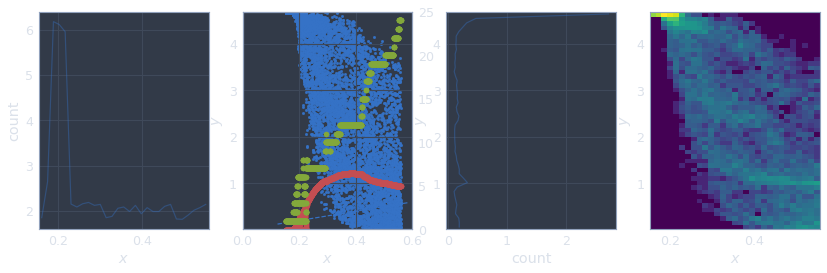

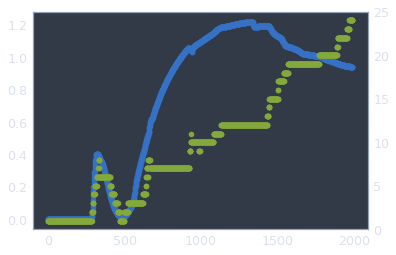

In [218]:
axs = pyvis.qc_2var(*np.broadcast_arrays(np.array(callback.betaHist)[:,None], callback.H)
                   ,nMax=int(1E4))

plt.sca(axs[1])
# plt.figure()
n = 2000
xmax = 0.6
ax = plt.gca()
plt.plot(callback.betaHist[-n:],callback.stats[-n:],'ro')
plt.xlim(0,xmax)
tax = ax.twinx()
tax.plot(callback.betaHist[-n:],callback.cluNum[-n:],'go')
# tax.set_xlim(0,0.4)
tax.set_ylim(0,25)

plt.figure()
plt.plot(callback.stats[-n:],'o')
tax = plt.gca().twinx()
tax.plot(callback.cluNum[-n:], 'go' )
tax.set_ylim(0,25)

(0, 25)

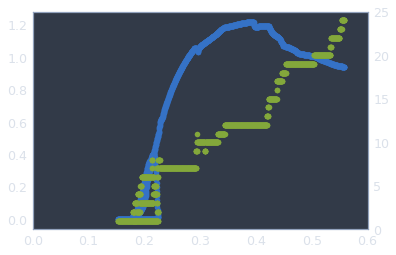

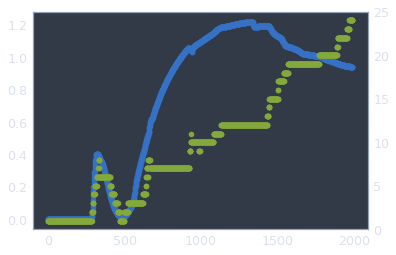

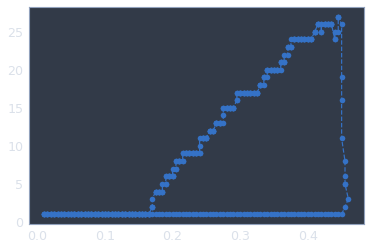

In [62]:
plt.plot(*np.array(callback.stats).T.tolist()+['o--'])

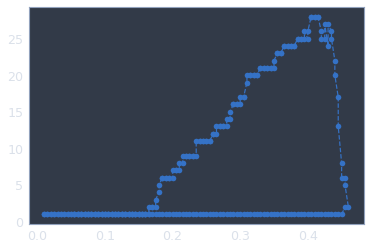

In [59]:
plt.plot(*np.array(callback.stats).T.tolist()+['o--'])

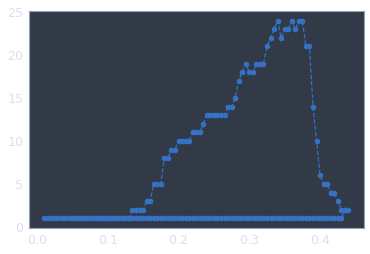

In [54]:
plt.plot(*np.array(callback.stats).T.tolist()+['o--'])

In [35]:
if 1:
    nIter = 500
    nStart = 1
    betas = lambda i: (i + 1) * 0.005 
    callback = pyfop.composeF(callback__setBeta(betas),
                             callback__stopOnClu(interval=1))
    data = din
    mdl0 =mdl = mod.MixtureVMF(init_method = 'random',
                        NCORE=NCORE,
                         beta = betas(0),
                         weighted =  True,
                         normalizeSample=0,
                        kappa = None,
                        K = 30,)
    res = mdl.fit(data,verbose=2,
                  nStart=nStart,
                  callback = callback,
                  min_iters = nIter,
                  max_iters = nIter,
                  sample_weights=None,
                 )                

[iter]0,                log_likelihood=0.07
[iter]10,                log_likelihood=600.16
[iter]20,                log_likelihood=1200.33
[iter]30,                log_likelihood=1800.49
[iter]40,                log_likelihood=2400.65
[iter]50,                log_likelihood=3000.82
[iter]60,                log_likelihood=3600.98
[iter]70,                log_likelihood=4201.15
[iter]80,                log_likelihood=4801.31
[iter]90,                log_likelihood=5401.47
[iter]100,                log_likelihood=6001.64
[iter]110,                log_likelihood=6601.80
[iter]120,                log_likelihood=7201.96
[iter]130,                log_likelihood=7802.13
[iter]140,                log_likelihood=8402.29
[iter]150,                log_likelihood=9002.45
[iter]160,                log_likelihood=9602.62
[iter]170,                log_likelihood=10202.78
[iter]180,                log_likelihood=10802.94
[iter]190,                log_likelihood=11403.11
[iter]200,                log_li

In [32]:
# pbetas(len(res))
beta = mdl.dists[0].beta
print beta

0.455


In [33]:
beta = mdl.dists[0].beta
callback = None
nIter = 100
mdl2 =mdl = mod.MixtureVMF(init_method = 'random',
                    NCORE=NCORE,
                     beta = beta,
                     weighted =  True,
                     normalizeSample=0,
                    kappa = None,
                    K = 30,)
res = mdl.fit(data,verbose=2,
              nStart=nStart,
              callback = callback,
#                       tol  = 1E-50,
#                   n_iter = 100,
              min_iters = nIter,
              max_iters = nIter,
              sample_weights=None,
             )    

[iter]0,                log_likelihood=9020.47
[iter]10,                log_likelihood=33423.20
[iter]20,                log_likelihood=33650.04
[iter]30,                log_likelihood=33696.56
[iter]40,                log_likelihood=33711.18
[iter]50,                log_likelihood=33716.73
[iter]60,                log_likelihood=33718.90
[iter]70,                log_likelihood=33720.02
[iter]80,                log_likelihood=33720.87
[iter]90,                log_likelihood=33721.96
[iter]100,                log_likelihood=33725.73
[]:Run 212. Loglikelihood: 33725.7304772
[Best]:Run : Loglikelihood: 33725.7304772


7


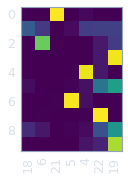

In [108]:
visModel(mdl0)

In [17]:
import pymisca.util as pyutil
plt = pyutil.plt; pd = pyutil.pd
import pymisca.vis_util as pyvis
%matplotlib inline


def visModel(mdl):
    data = din
    y_pred = clu = mdl.predict(data)
    clu = pd.DataFrame(y_pred,columns=['clu'])
    cluCount = pyutil.get_cluCount(clu)
    print len(cluCount)
    idx = cluCount.sort_values('count').clu
    confMat = pyutil.getConfusionMat(y_pred,y_true)
    pyvis.heatmap(confMat.loc[:,idx],xtick=idx)
    ll = mdl.lastLL
    return 

is in ipython: 1 
[WARN]No module named jinja2_util


[WARN] pymisca.vis_util cannot find network


In [273]:
class callback__stopOnClu(object):
    def __init__(self, interval = 10, cluMin = 2, burnin = 10):
        self.interval = interval
        self.cluMin  = cluMin
        self.burnin = burnin
        
    def __call__(self,*args):
        iteration, weight, distributions, log_likelihood, log_proba = args
        if iteration > self.burnin:
            if not iteration % self.interval:
                cluNum = len(set(np.argmax(log_proba,axis=1)))
                if cluNum >= self.cluMin:
                    args = (-1, ) + args[1:]
                    print ('[D]')
        return args
    
class callback__setBeta(object):    
    def __init__(self,betas):
        res = getattr(betas,'__getitem__',None)
        if res is not None:
            betas = res
        self.betas = betas
    def __call__(self, *args):
        iteration, weight, distributions, log_likelihood, log_proba = args
        beta = self.betas(iteration)
        for d in distributions:
            d.beta = beta
        return args

class callback__stopAndTurn(object):
    def __init__(self, interval = 1, cluMin = 2, burnin = 10,
                 afterTurn = 50,
                betas = None):
        self.interval = interval
        self.cluMin  = cluMin
        self.burnin = burnin
        self.betas = betas
        self.lastTurn = None
        self.right= None
        self.left = None
        self.stats = []
        self.betaHist = []
        self.cluNum = []
        self.H = []
        self.clusterH = []
#         self.mode = 'lr'
        self.mode = 'r'
        self.interval = 1
        self.mdls = []
    def saveModel(self,  *args):
        iteration, weight, distributions, log_likelihood, log_proba = args
        if not iteration % self.interval:
            mdl = mod.MixtureModel(weights=weight,
                                   dists= distributions,
                                   lastLL = log_likelihood,)
            self.mdls.append( 
                [ iteration, copy.deepcopy(mdl) ]
                      )
        return args      
    def __call__(self,*args):
        iteration, weight, distributions, log_likelihood, log_proba = args
        if iteration > self.burnin:
#             if not iteration % self.interval:
            cluNum = len(set(np.argmax(log_proba,axis=1)))
            self.cluNum.append(cluNum)
#             stat = cluNum
            part = pyutil.logsumexp(log_proba,axis=1,keepdims=1)
            proba = np.exp(log_proba - part)
            H = pyext.entropise(proba,normed=1,axis=1).sum(axis=1,keepdims=1)
            stat = H.std()
            resp = proba/proba.sum(axis=0,keepdims=1) 
            clusterH = (H * resp).sum(axis=0)
            beta = distributions[0].beta
            self.betaHist.append(beta)
            self.stats.append(stat)
#             self.H.append(H.ravel())
            self.clusterH.append(clusterH)
            self.saveModel(*args)
            
            if self.right is None:
                if cluNum >= self.cluMin:
                    self.rightIter  = self.lastTurn = iteration
                    
                    print ('[cbk]iter={iteration}: Now going left.'.format(**locals()))
                    self.right = beta
            elif self.left is None:
                if cluNum < self.cluMin:
                    self.lastTurn = iteration
                    self.leftIter = self.rightIter *2 - iteration
                    self.left = beta
                    print ('[cbk]iter={iteration}: Now going right.'.format(**locals()))
                    self.going = 'right'
                        
        if self.right is None:
            beta = self.betas(iteration)
#             self.turnBeta = beta
        else:
            if self.left is None:
                self.going = 'left'
                
            if self.going == 'left':
                vit = self.rightIter - ( iteration -  self.lastTurn)
                beta = self.betas(vit)
            else:
                vit =  self.leftIter + (  iteration - self.lastTurn  )
                beta = self.betas(vit)
                
#                     self.lastTurn = iteration
#                 beta = np.random.uniform(self.left,self.right)
            if (beta > self.right) and ('l' in self.mode):
                self.going = 'left'
                self.lastTurn = iteration
                print ('going %s' % self.going)
                
            if beta < self.left and ('r' in self.mode):
                self.going = 'right'
                self.lastTurn = iteration
                print ('going %s' % self.going)
                
#                     args = (-1, ) + args[1:]
        for d in distributions:
            d.beta = beta
        return args